<a href="https://colab.research.google.com/github/sb2011483/ITB2022/blob/main/sb_assignment2_alcohol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표: 음주 여부를 판단하는데 중요한 지표가 될 특성을 확인하고 이를 예측할 수 있는 모델을 구현한다.

##데이터 EDA

In [1]:
%%capture
import sys


if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score, classification_report, roc_auc_score, accuracy_score, plot_confusion_matrix
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
from lightgbm import LGBMClassifier, plot_importance

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/python/health_data.csv",encoding='CP949')

# features

'성별코드'(sex)= ­ 성별 : 1(남자), 2(여자)

'흡연상태'(smoke)= ­ 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)

Target '음주여부'(alcohol)= ­ 0(마시지 않는다), 1(마신다)

로 전처리 하였다

In [5]:
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,NaN,0.0,0,NaN,NaN,12/29/21
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,12/29/21
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,12/29/21
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,12/29/21
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,12/29/21


In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  int64  
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [7]:
health= health.sample(frac=0.02, replace=True, random_state=1)

In [8]:
health.isna().sum()

기준년도             0
가입자일련번호          0
시도코드             0
성별코드             0
연령대코드(5세단위)      0
신장(5Cm단위)        0
체중(5Kg 단위)       0
허리둘레             0
시력(좌)            0
시력(우)            0
청력(좌)            0
청력(우)            0
수축기혈압            0
이완기혈압            0
식전혈당(공복혈당)       0
총콜레스테롤         126
트리글리세라이드       126
HDL콜레스테롤       126
LDL콜레스테롤       127
혈색소              0
요단백              0
혈청크레아티닌          0
(혈청지오티)AST       0
(혈청지오티)ALT       0
감마지티피            0
흡연상태             0
음주여부             0
구강검진수검여부         0
치아우식증유무        133
치석             133
데이터공개일자          0
dtype: int64

In [9]:
drop=['치아우식증유무', '치석', '데이터공개일자', '기준년도']

health.drop(drop, axis=1, inplace=True)

In [10]:
# 중복값 
health.duplicated().sum()
# 중복값 제거
health.drop_duplicates(inplace=True)

In [11]:
health.describe().T

,count,mean,std,min,25%,50%,75%,max
가입자일련번호,197.0,4607.487310,3013.280018,16.0,1845.00,4566.0,7338.00,9992.0
시도코드,197.0,33.842640,11.793314,11.0,27.00,41.0,42.00,49.0
성별코드,197.0,1.512690,0.501112,1.0,1.00,2.0,2.00,2.0
연령대코드(5세단위),197.0,11.730964,2.088283,9.0,10.00,11.0,13.00,17.0
신장(5Cm단위),197.0,160.989848,8.654944,140.0,155.00,160.0,170.00,180.0
체중(5Kg 단위),197.0,63.350254,11.723610,40.0,55.00,65.0,70.00,100.0
허리둘레,197.0,82.293909,9.030152,57.5,77.00,82.0,87.00,105.1
시력(좌),197.0,0.889848,0.331968,0.1,0.70,0.9,1.20,1.5
시력(우),197.0,1.054822,1.153451,0.1,0.70,1.0,1.20,9.9
청력(좌),197.0,1.025381,0.157679,1.0,1.00,1.0,1.00,2.0


In [12]:
health.columns= ['number', 'sex', 'age', 'sido', 'height', 'weight', 'waist', 'sight_l', 'sight_r',
             'hear_l', 'hear_r', 'sbp', 'dbp', 'fbs', 'total_cho', 'trigly', 'hdl', 'ldl', 'hemo', 'up', 'creatin', 'ast', 'alt', 'gtp', 'smoke', 'alcohol', 'hchk']

In [13]:
health.up.mode()
health['up']= health['up'].fillna(1)


health['ldl']= health['ldl'].fillna(111)

# bmi 지수 추가
health['bmi']= health.weight / ((health.height / 100)**2) 

health= health.dropna(axis=0)

In [14]:
# data clean
def clean(health):

  outlier = ['sight_l', 'sight_r', 'trigly', 'ast', 'gtp']

  for i in outlier:
    # 이상치 제거
    health[i]= health[health[i] < np.percentile(health[i], 99.9)][i]

    # 이상치 제거 후 결측치 삭제
    health= health.dropna(subset=[i], axis=0)

  return health

In [15]:
health= clean(health)

In [16]:
health.describe().T

,count,mean,std,min,25%,50%,75%,max
number,63.0,4265.380952,3025.642285,110.000000,1677.500000,3411.000000,7021.000000,9992.000000
sex,63.0,32.158730,13.260670,11.000000,26.000000,36.000000,41.500000,49.000000
age,63.0,1.523810,0.503444,1.000000,1.000000,2.000000,2.000000,2.000000
sido,63.0,11.619048,2.323988,9.000000,9.000000,11.000000,13.000000,17.000000
height,63.0,160.634921,8.205627,145.000000,155.000000,160.000000,165.000000,180.000000
weight,63.0,63.333333,12.181424,45.000000,55.000000,60.000000,70.000000,95.000000
waist,63.0,82.838095,8.563942,65.000000,78.000000,82.000000,87.300000,105.000000
sight_l,63.0,0.769841,0.275116,0.100000,0.600000,0.800000,1.000000,1.200000
sight_r,63.0,0.831746,0.280452,0.200000,0.700000,0.800000,1.000000,1.500000
hear_l,63.0,1.047619,0.214669,1.000000,1.000000,1.000000,1.000000,2.000000


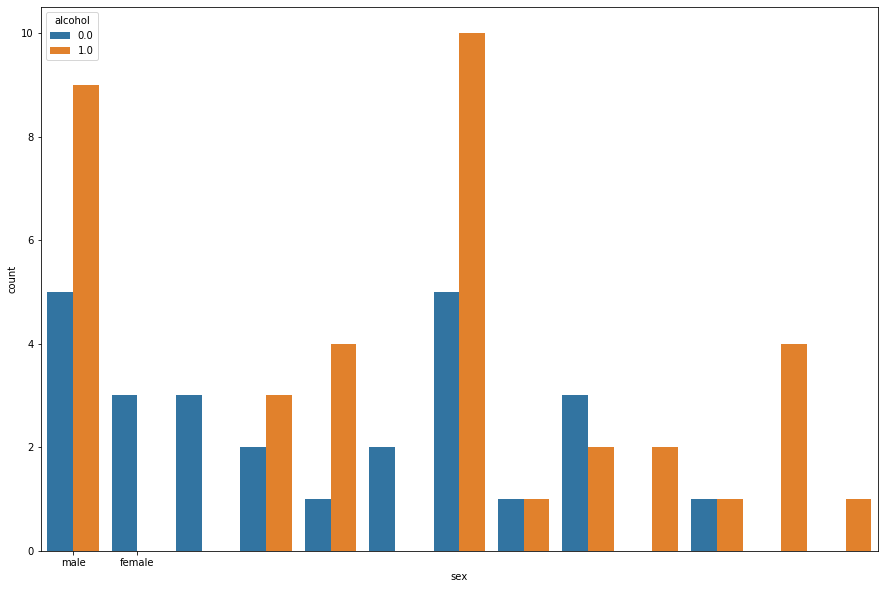

In [17]:
plt.figure(figsize= (15, 10))
sns.countplot(x='sex', data= health, hue= 'alcohol')
plt.xticks([0,1], ['male', 'female']);

In [18]:
health.sex.value_counts(normalize=True)

41    0.238095
11    0.222222
45    0.079365
28    0.079365
30    0.079365
48    0.063492
26    0.047619
27    0.047619
36    0.031746
47    0.031746
42    0.031746
46    0.031746
49    0.015873
Name: sex, dtype: float64

In [19]:
health.alcohol.value_counts(normalize=True)

1.0    0.587302
0.0    0.412698
Name: alcohol, dtype: float64

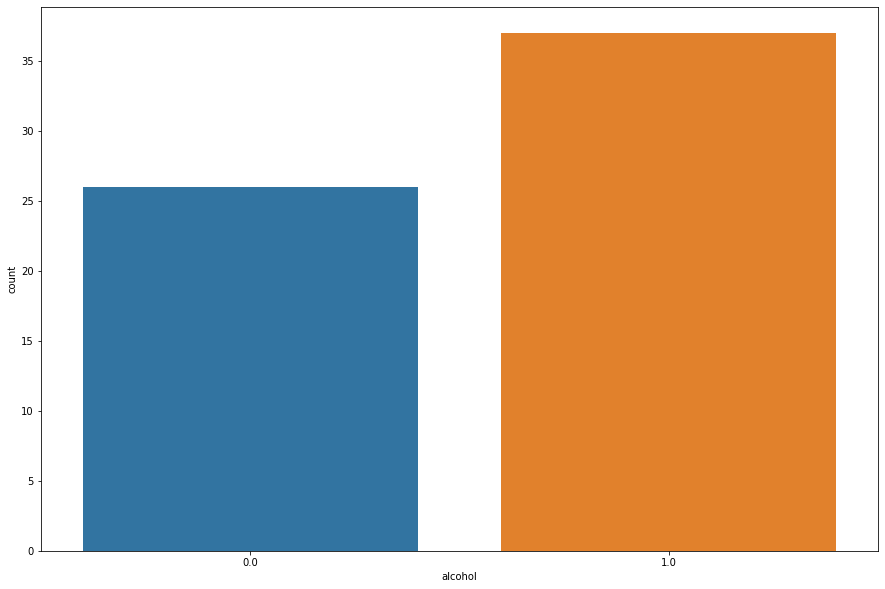

In [20]:
plt.figure(figsize= (15,10))
sns.countplot(health.alcohol)

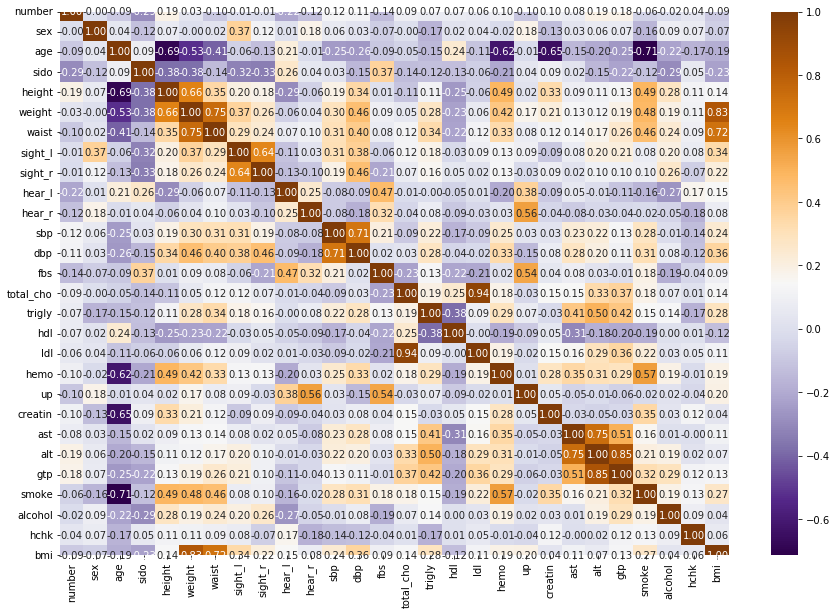

In [21]:
plt.figure(figsize= (15, 10))

sns.heatmap(health.corr(), annot=True, fmt= '.2f',cmap= 'PuOr_r')

-> 상관계수 0에 가까운 특성 무의미함

In [22]:
drop2= ['total_cho', 'up', 'sido']
health = health.drop(drop2, axis=1)

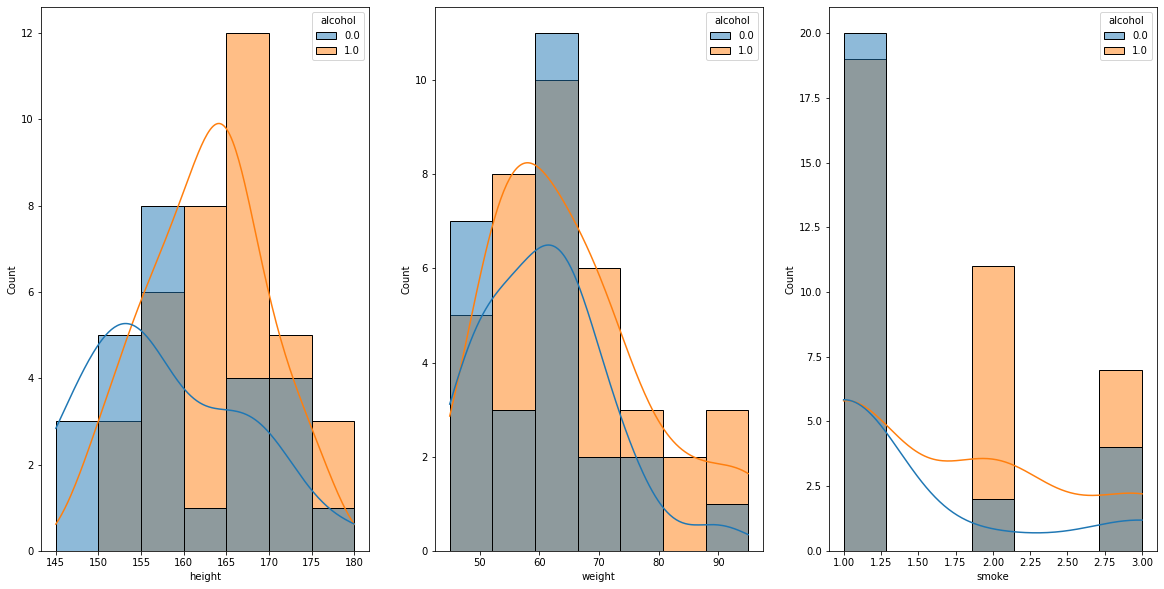

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.histplot(data=health, x='height', hue='alcohol', kde=True, ax=ax[0])
sns.histplot(data=health, x='smoke', hue='alcohol', kde=True, ax=ax[2])
sns.histplot(data=health, x='weight', hue='alcohol', kde=True, ax=ax[1])

->신장과, 체중이 클수록 술을 많이 마심
흡연자가 술을 더 많이 마시는 것을 알 수 있다

In [24]:
target= 'alcohol'
features= health.columns.drop(target)

In [25]:
features

Index(['number', 'sex', 'age', 'height', 'weight', 'waist', 'sight_l',
       'sight_r', 'hear_l', 'hear_r', 'sbp', 'dbp', 'fbs', 'trigly', 'hdl',
       'ldl', 'hemo', 'creatin', 'ast', 'alt', 'gtp', 'smoke', 'hchk', 'bmi'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(health, test_size=0.20, 
                              stratify=health[target], random_state=2)

train, val = train_test_split(train, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((40, 25), (10, 25), (13, 25))

randomF,XGBoost사용

모델 평가지표로 f1_Score,roc_auc score 사용

In [27]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

Baseline Model - 50%

In [28]:
print(train[target].value_counts(normalize=True))

# 전체 데이터 기준모델 설정
major= health[target].mode()[0]
pred= [major] * len(health[target])
baseline= accuracy_score(health[target], pred)
print('baseline_accuarcy_Score=', baseline)

1.0    0.575
0.0    0.425
Name: alcohol, dtype: float64
baseline_accuarcy_Score= 0.5873015873015873


In [29]:
pipe_rf = make_pipeline(
    RandomForestClassifier(n_jobs=-1, 
                           max_depth= 2,
                           min_samples_split=2,
                           min_samples_leaf= 10,
                           random_state=2)
)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, min_samples_leaf=10,
                                        n_jobs=-1, random_state=2))])

In [30]:
pred_val= pipe_rf.predict(X_val)
print('train_score=', pipe_rf.score(X_train, y_train))
print('val_score=', pipe_rf.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_val))
print('accuracy_score=', accuracy_score(y_val, pred_val))

print(classification_report(y_val, pred_val))

train_score= 0.725
val_score= 0.7
f1_score= 0.8
accuracy_score= 0.7
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         1.0       0.67      1.00      0.80         6

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



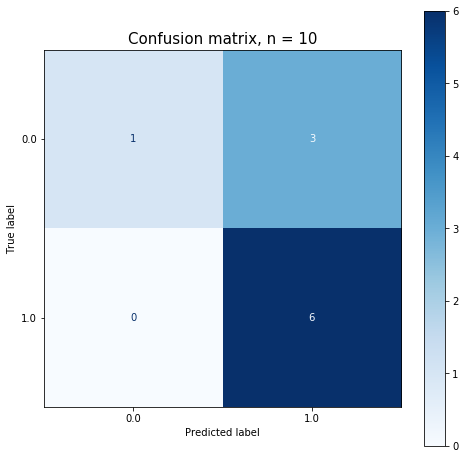

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))


pcm = plot_confusion_matrix(pipe_rf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

AUC score:  0.75


Text(0, 0.5, 'TPR')

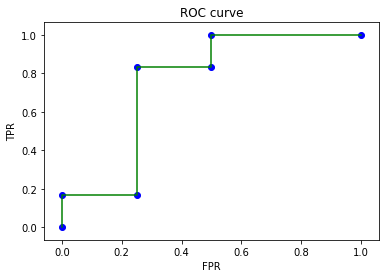

In [32]:
'''
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ROCAUC
'''
# 음주여부를 구분하는 지표로 활용
y_pred_proba = pipe_rf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

# AUC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

randomForest

In [33]:
dists = {
    'randomforestclassifier__criterion': ['entrophy', 'gini'], # 분할 품질을 측정하는 기능
    'randomforestclassifier__n_estimators': randint(50, 120), # 모델에 사용할 트리 개수
    'randomforestclassifier__max_depth': np.arange(2, 10), # 트리 깊이
    'randomforestclassifier__max_features': uniform(0, 1), # 분할에 사용할 특성 수
    'randomforestclassifier__min_samples_leaf': np.arange(1, 15, 5) # 리프 노드에 있어야 할 최소 샘플 수
}

clf_rf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring= 'accuracy',  
    verbose=1,
    n_jobs=-1
)

clf_rf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [34]:
print('최적 하이퍼파라미터= ', clf_rf.best_params_)
print('accuracy_score= ', clf_rf.best_score_)

최적 하이퍼파라미터=  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.09609328780549453, 'randomforestclassifier__min_samples_leaf': 6, 'randomforestclassifier__n_estimators': 98}
accuracy_score=  0.6025641025641025


In [35]:
best_rf = clf_rf.best_estimator_
best_rf.fit(X_train, y_train)
pred_val_rf = best_rf.predict(X_val)

print('train_score=', best_rf.score(X_train, y_train))
print('val_score=', best_rf.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_val_rf))
print('accuracy_score=', accuracy_score(y_val, pred_val_rf))

print(classification_report(y_val, pred_val_rf))

# roc_auc_score
y_pred_proba1 = best_rf.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba1))

train_score= 0.8
val_score= 0.7
f1_score= 0.8
accuracy_score= 0.7
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         1.0       0.67      1.00      0.80         6

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10

AUC score:  0.7083333333333334


In [36]:
pipe_xg = make_pipeline(
    XGBClassifier(max_depth=2,
                  random_state=10,
                  min_samples_split=2,
                  min_samples_leaf= 10,
                  n_jobs=-1) 

)

pipe_xg.fit(X_train, y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(max_depth=2, min_samples_leaf=10,
                               min_samples_split=2, n_jobs=-1,
                               random_state=10))])

In [37]:
pred_valxg= pipe_xg.predict(X_val)
print('train_score=', pipe_xg.score(X_train, y_train))
print('val_score=', pipe_xg.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_valxg))
print('accuracy_score=', accuracy_score(y_val, pred_valxg))

print(classification_report(y_val, pred_valxg))

y_pred_xgproba = pipe_xg.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_xgproba))

train_score= 1.0
val_score= 0.4
f1_score= 0.4
accuracy_score= 0.4
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         4
         1.0       0.50      0.33      0.40         6

    accuracy                           0.40        10
   macro avg       0.42      0.42      0.40        10
weighted avg       0.43      0.40      0.40        10

AUC score:  0.45833333333333337


XGboost

In [38]:
dists_xg = {
    'xgbclassifier__n_estimators': randint(50, 120), # 모델에 사용할 트리 개수
    'xgbclassifier__max_depth': np.arange(1, 10), # 트리 깊이
    'xgbclassifier__max_features': uniform(0, 1), # 분할에 사용할 특성 수
    'xgbclassifier__min_samples_leaf': np.arange(1, 15, 5) # 리프 노드에 있어야 할 최소 샘플 수
}
clf_xg = RandomizedSearchCV(
    pipe_xg, 
    param_distributions=dists_xg, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf_xg.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [39]:
print('최적 하이퍼파라미터= ', clf_xg.best_params_)
print('accuracy_score=', clf_xg.best_score_)

최적 하이퍼파라미터=  {'xgbclassifier__max_depth': 8, 'xgbclassifier__max_features': 0.09907401234063273, 'xgbclassifier__min_samples_leaf': 11, 'xgbclassifier__n_estimators': 55}
accuracy_score= 0.5750915750915752


In [40]:
best_xg = clf_xg.best_estimator_
best_xg= best_xg.fit(X_train, y_train)
pred_val_xg = best_xg.predict(X_val)

print('train_score=', best_xg.score(X_train, y_train))
print('val_score=', best_xg.score(X_val, y_val))
print('f1_score=', f1_score(y_val, pred_val_xg))
print('accuracy_score=', accuracy_score(y_val, pred_val_xg))

print(classification_report(y_val, pred_val_xg))

# roc_auc_score
y_pred_xgproba1 = best_xg.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_xgproba1))

train_score= 1.0
val_score= 0.4
f1_score= 0.4
accuracy_score= 0.4
              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40         4
         1.0       0.50      0.33      0.40         6

    accuracy                           0.40        10
   macro avg       0.42      0.42      0.40        10
weighted avg       0.43      0.40      0.40        10

AUC score:  0.41666666666666663


In [41]:
rf_score= f1_score(y_val, pred_val)
rf_best_score= f1_score(y_val, pred_val_rf)
xg_score= f1_score(y_val, pred_valxg)
xg_best_score= f1_score(y_val, pred_val_xg)

#accuracy
rf_accuracy= accuracy_score(y_val, pred_val)
rf_best_accuracy= accuracy_score(y_val, pred_val_rf)
xg_accuracy= accuracy_score(y_val, pred_valxg)
xg_best_accuracy= accuracy_score(y_val, pred_val_xg)

# roc_auc_Score
rf_roc= roc_auc_score(y_val, y_pred_proba)
rf_best_roc= roc_auc_score(y_val, y_pred_proba1)
xg_roc= roc_auc_score(y_val, y_pred_xgproba)
xg_best_roc= roc_auc_score(y_val, y_pred_xgproba1)

Model 성능

In [42]:
model_ev = pd.DataFrame({'Model': ['Randomforest', 'Randomforest_best', 'XGboost', 'XGboost_best'],
                         'f1_score': [rf_score*100, rf_best_score*100, xg_score*100, xg_best_score*100],
                         'roc_auc_score': [rf_roc*100, rf_best_roc*100, xg_roc*100, xg_best_roc*100],
                         'accuracy_score': [rf_accuracy*100, rf_best_accuracy*100 , xg_accuracy*100, xg_best_accuracy*100]})
model_ev.T

,0,1,2,3
Model,Randomforest,Randomforest_best,XGboost,XGboost_best
f1_score,80.0,80.0,40.0,40.0
roc_auc_score,75.0,70.833333,45.833333,41.666667
accuracy_score,70.0,70.0,40.0,40.0


->교차검증을 통해 모델 성능 개선하여 평가지표에서 가장 좋은 점수를 받은 Randomforest 선택

In [43]:
pipe_rf.fit(X_test, y_test)

y_test_pred_xg = pipe_rf.predict(X_test)

print('test_score=', pipe_rf.score(X_test, y_test))
print('test_f1_score=', f1_score(y_test, y_test_pred_xg))
print('accuracy_score=', accuracy_score(y_test, y_test_pred_xg))

print('baseline=', accuracy_score(health[target], pred))
print('test_roc', roc_auc_score(y_test, y_test_pred_xg))

test_score= 0.6153846153846154
test_f1_score= 0.761904761904762
accuracy_score= 0.6153846153846154
baseline= 0.5873015873015873
test_roc 0.5


In [44]:
permuter = PermutationImportance(
    pipe_rf.named_steps['randomforestclassifier'], 
    scoring='accuracy', 
    n_iter=10, 
    random_state=5
)

permuter.fit(X_test, y_test);

feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()


eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0 ± 0.0000,bmi
0 ± 0.0000,hchk
0 ± 0.0000,sex
0 ± 0.0000,age
0 ± 0.0000,height
0 ± 0.0000,weight
0 ± 0.0000,waist
0 ± 0.0000,sight_l
0 ± 0.0000,sight_r
0 ± 0.0000,hear_l


In [45]:
model = XGBClassifier(max_depth=4,
                      n_estimators= 63,
                      min_samples_leaf= 6,
                      n_jobs=-1,
                      random_state=10,
                      max_features= 0.15138769136419727
)
    
model.fit(X_train, y_train)

XGBClassifier(max_depth=4, max_features=0.15138769136419727, min_samples_leaf=6,
              n_estimators=63, n_jobs=-1, random_state=10)

In [46]:
final_proba = model.predict_proba(X_test)[:,1]

df_p = pd.DataFrame({
    'id': X_test.index, 
    'pred_proba': final_proba, # 예측확률 
    'actual_val': y_test # 실제값
})

df_p[X_test.columns] = X_test.values
df_p.drop(columns = 'id', inplace = True)
df_p.head()

,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,...,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
1031,0.874425,1.0,1032.0,28.0,2.0,160.0,55.0,76.0,0.8,0.8,...,64.0,61.0,13.7,0.8,29.0,24.0,24.0,1.0,0.0,21.484375
3410,0.955123,1.0,3411.0,45.0,1.0,160.0,60.0,90.0,1.0,1.0,...,56.0,130.0,16.5,1.0,34.0,49.0,45.0,2.0,0.0,23.437500
2760,0.264860,0.0,2761.0,26.0,2.0,155.0,65.0,93.0,0.5,0.9,...,58.0,115.0,13.4,0.8,36.0,34.0,24.0,1.0,1.0,27.055151
1888,0.703927,1.0,1889.0,28.0,1.0,175.0,95.0,103.6,1.0,0.7,...,36.0,188.0,17.3,0.9,51.0,61.0,100.0,3.0,1.0,31.020408
1067,0.088254,0.0,1068.0,28.0,2.0,145.0,65.0,87.6,0.8,0.8,...,52.0,165.0,12.7,0.8,20.0,15.0,12.0,1.0,1.0,30.915577


In [47]:
drink = df_p['actual_val'] == 1
no_drink = ~drink
right = (drink) == (df_p['pred_proba'] > 0.50)
wrong = ~right

In [48]:
df_p[drink & right].sample(replace=False, random_state=1).sort_values(by='pred_proba')

,pred_proba,actual_val,number,sex,age,height,weight,waist,sight_l,sight_r,...,hdl,ldl,hemo,creatin,ast,alt,gtp,smoke,hchk,bmi
5271,0.620808,1.0,5272.0,41.0,1.0,160.0,65.0,95.0,0.9,1.0,...,65.0,113.0,16.0,1.0,18.0,16.0,19.0,2.0,1.0,25.390625
